In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [12]:
df = pd.read_csv('NFLX.csv')

In [13]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
4350,2019-09-04,291.250000,292.380005,286.510010,291.519989,291.519989,4652500
4351,2019-09-05,285.320007,293.970001,282.790009,293.250000,293.250000,8966800
4352,2019-09-06,293.350006,293.350006,287.029999,290.170013,290.170013,5166600
4353,2019-09-09,294.809998,301.549988,290.600006,294.339996,294.339996,8232700


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4355 entries, 0 to 4354
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4355 non-null   object 
 1   Open       4355 non-null   float64
 2   High       4355 non-null   float64
 3   Low        4355 non-null   float64
 4   Close      4355 non-null   float64
 5   Adj Close  4355 non-null   float64
 6   Volume     4355 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 238.3+ KB


###    volume of stocks traded yearly

sns.set(rc={'figure.figsize' : (10,5)})

In [17]:
df['Date']  = pd.to_datetime(df['Date'])
dt = df.set_index('Date')

In [18]:
dt.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


Text(0.5, 1.0, 'Total volume of stocks with respect to time')

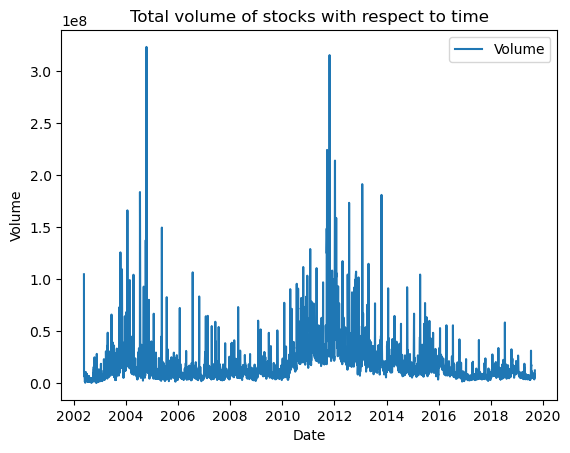

In [19]:
sns.lineplot(x = dt.index,y = dt['Volume'], label = 'Volume')
plt.title('Total volume of stocks with respect to time')

Text(0.5, 1.0, 'Position of stock with respect to time')

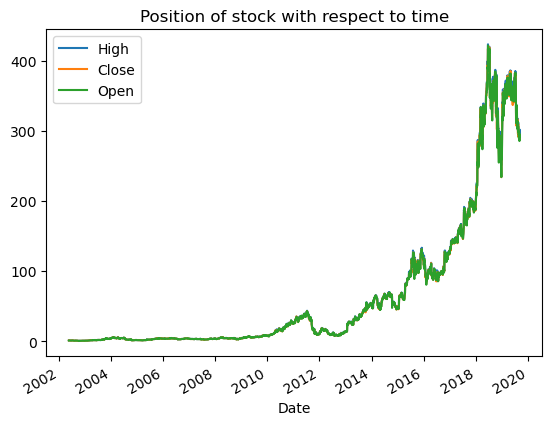

In [20]:
dt.plot(y = ['High','Close','Open'], label = ['High','Close','Open'] )
plt.title ('Position of stock with respect to time')

## Position of stock (2020-2002)

<Axes: xlabel='Year'>

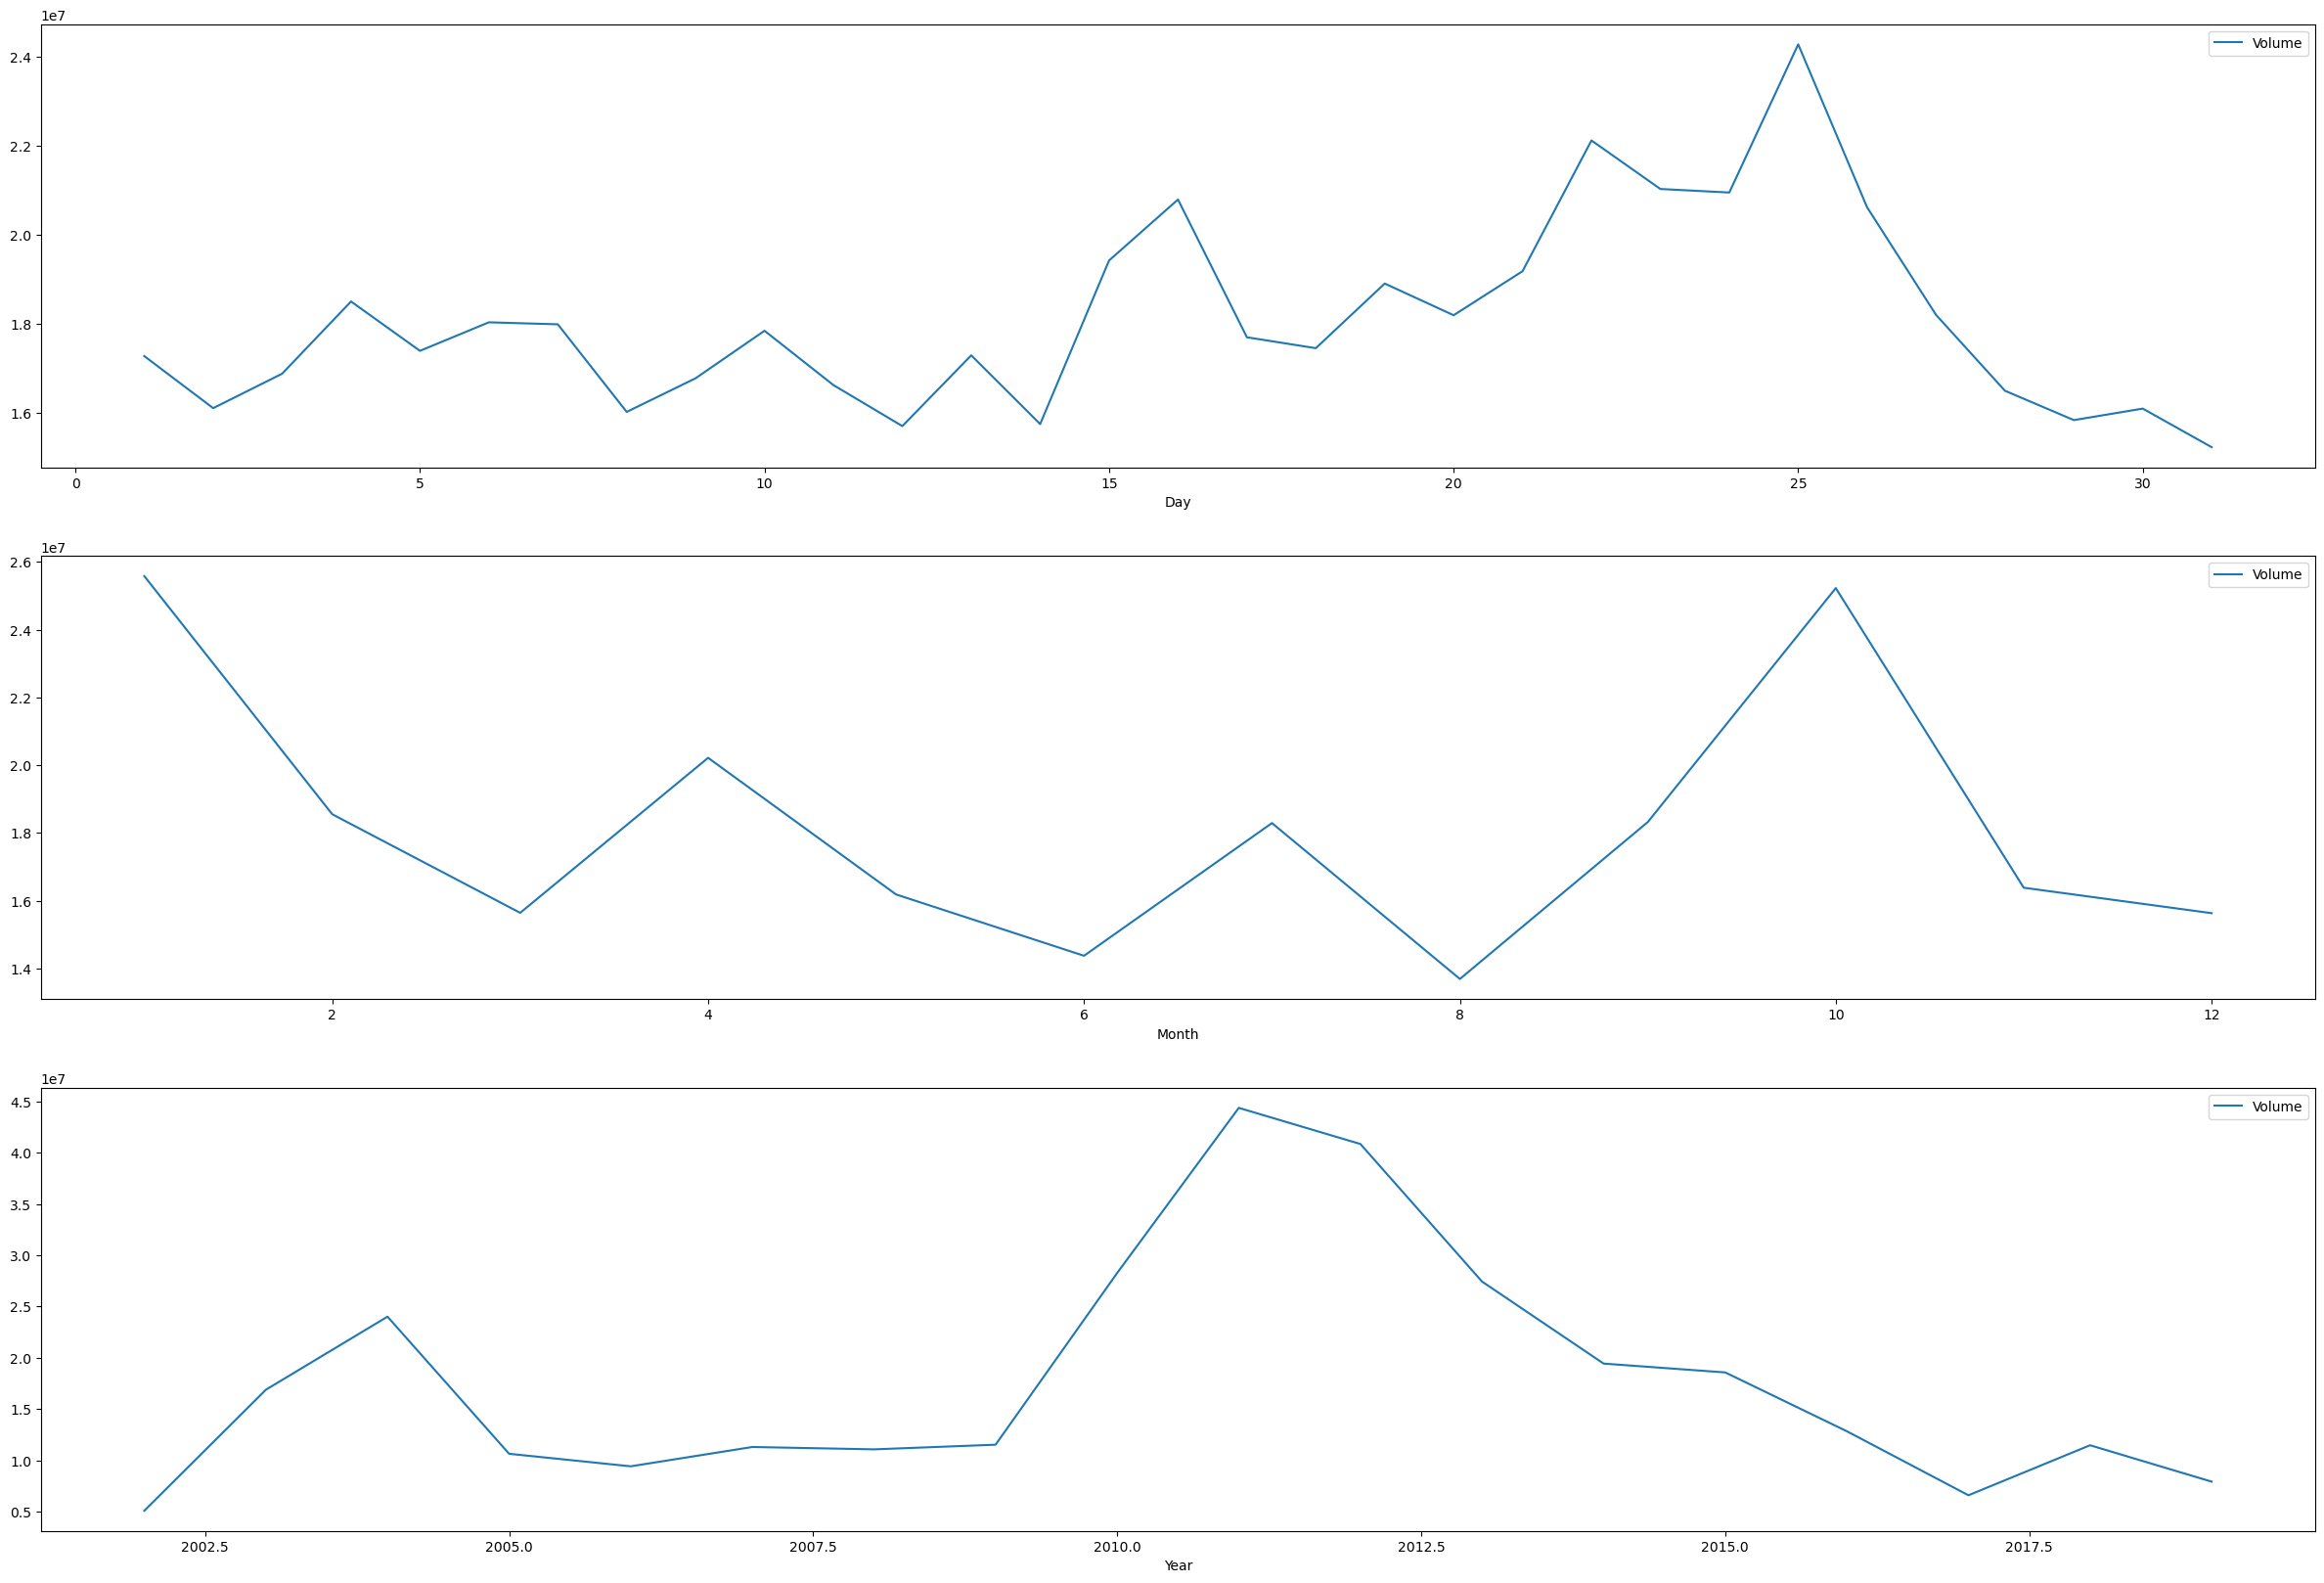

In [22]:
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize = (30 ,20))
dt.groupby(dt.index.day).mean().plot(y = 'Volume', ax = ax1, xlabel = 'Day')
dt.groupby(dt.index.month).mean().plot(y = 'Volume', ax = ax2, xlabel = 'Month')
dt.groupby(dt.index.year).mean().plot(y = 'Volume', ax = ax3, xlabel = 'Year')


###                Dates with highest stock price

In [24]:
d = dt.sort_values(by = 'High', ascending = False).head (10)
d['High']

Date
2018-06-21    423.209991
2018-06-22    420.500000
2018-07-11    419.769989
2018-06-20    419.470001
2018-07-10    419.440002
2018-07-09    419.119995
2018-07-12    416.790009
2018-06-27    411.589996
2018-07-13    410.000000
2018-07-06    408.649994
Name: High, dtype: float64

### Dates with lowest stock price

In [26]:
b = dt.sort_values(by= 'Low', ascending  = True).head(10)
b['Low']

Date
2002-10-10    0.346429
2002-10-09    0.347143
2002-10-07    0.382143
2002-10-08    0.390714
2002-10-16    0.442857
2002-10-11    0.446429
2002-10-04    0.447143
2002-10-14    0.463571
2002-10-17    0.471429
2002-10-03    0.489286
Name: Low, dtype: float64

<Axes: xlabel='Date', ylabel='Low'>

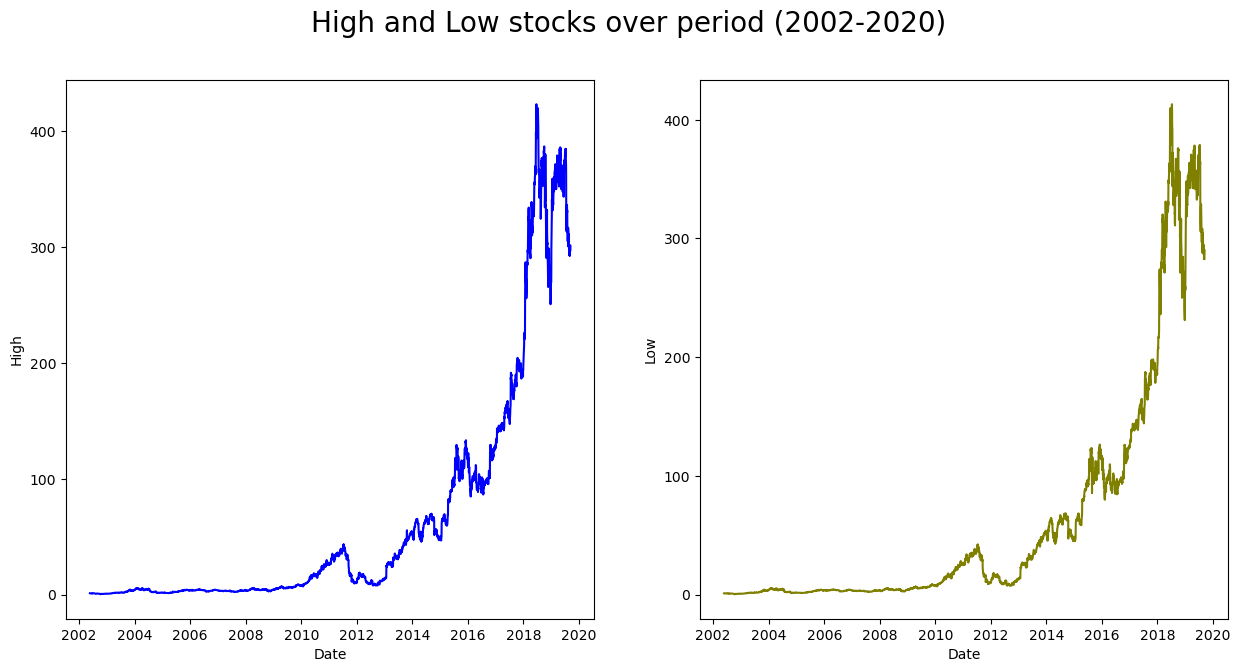

In [27]:
fig,axes = plt.subplots(nrows = 1, ncols =2, sharex = True, figsize = (15,7))
fig.suptitle('High and Low stocks over period (2002-2020)' , fontsize = 20)
sns.lineplot(ax= axes[0], y= dt['High'],x= dt.index, color = 'blue')
sns.lineplot(ax= axes[1],y= dt['Low'], x= dt.index , color = 'olive')